# Intercepted: Analyzing Wiretap Records from the US Courts
##### Author: Henry Peyronnin

<img src= "http://www.tveskimo.com/wp-content/uploads/2017/11/The-Wire-Back-Burners-Recap-Season-3-Episode-7-2-1.png" height= 50% width = 50% style="float:left" />

## Contents
[Introduction](#Introduction)<br>
[Literature Review](#Literature-Review)<br>
[Exploratory Data Analysis](#Exploratory-Data-Analysis)

## Introduction

Under Title III of The Omnibus Crime Control and Safe Streets Act of 1968 and 18 U.S.C. § 2519, The Administrative Office of the United States Courts (AO) is required to publish annual federal and state __[records](https://www.uscourts.gov/statistics-reports/analysis-reports/wiretap-reports)__ of interception orders for wire, oral, or electronic communications. For each intercept, the AO's annual report includes information on the total cost and duration, the offense under investigation, the jurisdiction, and other data. The full set of variables is listed below.
    
    State
    Jurisdiction
    AO Number
    Judge
    Prosecutor
    Offense
    Intercept Type
    Location
    Application Date
    Original Order (Days)
    Number of Extensions
    Total Length (Days)
    Installation
    Number of Days in Operation
    Average Intercepts per Day
    Number of Persons Intercepted
    Number of Incriminating Intercepts
    Total Cost in Dollars
    Other Than Manpower Cost in Dollars
    Arrests
    Trials
    Motions to Suppress Intercepts
    Persons Convicted
    Cost Related
    Results Related
    
These data reveal important information about the use of surveillance in criminal investigations. Where are wiretaps used most, and for what types of crimes are they most often deployed? How do wiretap characteristics vary by crime, geography, and time period? What underlying changes in technology, policy, or society might explain these trends? Analyzing wiretap records also allow us to gauge their efficacy of as an investigative tool. How often do wiretaps result in arrests or convictions? Do their benefits outweight their costs? The overarching objective of this report is to answer some of these questions. 



## Literature Review

The breakup of AT&T in 1982 and Bell Systems later that decade led to a period of renewed competition, growth, and innovation in the telecommunications industry. As the number of telecommunications companies proliferated and new technologies flooded the market, the FBI struggled to keep pace with these new source of complexity. Worried about how this would affect their ability to conduct surveillance, the FBI pursued legislation in Congress that would protect its wiretapping abilities from the effect of potentially disruptive technologies. The FBI's argument in favor of legislative protection rested on a key unstated assumption: that wiretaps are indeed vital tools for law enforcement. Is this assumption indeed valid? In _Privacy on the Line_, Susan Landau and Whitfield Diffie (2010) attempt to find out by digging into the data on wiretaps. They draw mostly on records from 1988 to 1994, but also include data from 1968 to 2006. Their analysis yields insights into the efficacy of wiretaps as well as other aspects of their usage. 

When federal wiretap regulation went into effect in 1968, the majority of wiretaps (64%) were used for investigating gambling cases. Since then, however, the share of wiretaps devoted to narcotics investigations has steadily increased. In 1994, narcotics investigations accounted for 77% of all cases using electronic surveillance. As the use of electronic surveillance increasingly became concentrated on narcotics investigations, the average wiretap became longer and more costly. Between 1968 and 1994, the average cost of a wiretap rose from 1,358 to 49,478 dollars, and the length doubled from 20 to nearly 40 days (p. 209). This shift was largely due to the lengthy timelines involved in drug investigations, which can span months or years. 

Wiretaps occasionally result in large drug busts, which are often then used by advocates to defend the practice of wiretapping. It is unlikely that wiretaps actually affect the underlying problem of consumption, however, or that they are a better use of funds than alternative methods of stemming drug use (p. 211). The FBI has likewise cited the importance of wiretaps in investigations of kidnapping and domestic terrorism. Between 1968 and 1994, however, electronic surveillance only played a role in just 2-3 kidnapping cases per year, and domestic terrorism cases are more likely to be investigated under the Foreign Intelligence Surveillance Act (p. 211).

At the state level, 48 jurisdictions have laws that permit that authorize courts to issue orders for oral, wire, or electronic surveillance (AO, 2017). In 2017, the states with the most wiretaps were California, New York, Nevada, California, and North Carolina. Since the 1990s, California has seen a massive increase in wiretaps: from 8 in 1994 to 225 in 2017 (p. 212; AO, 2017). 

Many of the trends first observed by Landau and Diffie have continued apace in the 21st century, but two major changes in wiretapping have occured since the 1990s. First, portable devices became the most commonly wiretapped devices as people switched from landlines to mobile phones. Because portable devices increased the number of daily communications per person, the first change begot a second: the government began intercepting ever-greater volumes of communications. The number of intercepted conversations has increased from around 400,000 in 1968 to over 2 million (pp. 214-215).

Landau and Diffie note several limitations in the _Wiretap Report_ data. First, its statistics do not distinguish wiretaps from bugs. Second, due to reporting issues the data may actually underestimate the total number of intercepts installed. Third, the data lack important contextual information from the court hearings themselves.

## Exploratory Data Analysis

[Federal Courts](#Federal-Courts)<br>
[State Courts](#State-Courts)

In [123]:
#import libraries
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Federal Courts

In [124]:
#read federal intercept data
fed17 = pd.read_csv('fedwire_2017.csv')
fed17.head()

,Jurisdiction,A.O. Number,Judge,Attorney General or Designee,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,...,Total Cost($),Other Than Manpower Cost ($),Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related
0,"ALABAMA, MIDDLE",2017-1,"ALBRITTON, III",NaN,NARCOTICS,WC,D,02/28/2017,30.0,0.0,...,"269,859",0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1,"ALABAMA, MIDDLE",2017-2,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"ALABAMA, MIDDLE",2017-3,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,02/28/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"ALABAMA, MIDDLE",2017-4,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,03/07/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"ALABAMA, MIDDLE",2017-5,"ALBRITTON, III",BLANCO,DRUGS - ILLEGAL,"WC,TX",D,04/05/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
#summarize data
fed17.describe()

,Original Order (Days),Number of Extensions,Total Length (Days),Number of Days in Operation,Avg. Intercepts Per Day,Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted
count,3019.000000,3026.000000,3026.000000,1718.000000,1688.000000,1633.000000,1619.000000,1621.000000,1621.000000,1621.000000,1619.000000
mean,29.836038,0.522802,45.279247,41.833527,414.114336,2.357012,0.017912,0.046885,0.024059,0.001234,0.362569
std,1.663931,1.097996,32.928960,33.149863,12546.685926,7.362417,0.318836,1.233393,0.641209,0.035115,2.941558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,30.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,30.000000,30.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1.000000,60.000000,58.000000,115.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,16.000000,510.000000,510.000000,515477.000000,130.000000,11.000000,40.000000,25.000000,1.000000,70.000000


In [126]:
#Number of wiretaps per offense
fed17['Offense'].value_counts()

NARCOTICS               1839
DRUGS - ILLEGAL          526
CONSPIRACY               422
$LAUNDERING               35
RACKETEERING              33
OTHER                     28
CORRUPTION                21
FRAUD                     20
MURDER                    19
DRUGS - PRESCRIPTION      15
FIREARMS                  13
BRIBERY                   11
POSSESSION                 8
GAMBLING                   6
KIDNAPPING                 5
EXTORTION                  5
ROBBERY                    3
LOANSHARKING               2
TERRORISM                  2
SMUGGLING                  2
IMMIGRATION                2
CIVIL RIGHTS               1
ASSAULT                    1
BOMBING                    1
THEFT                      1
USURY                      1
EMBEZZLEMENT               1
COERCION                   1
Name: Offense, dtype: int64

In [127]:
#Number of wiretaps by type
fed17['Type'].value_counts()

WC,TX          1252
WC             1164
TX              220
WC,TX,EO         59
WC,EO            59
TX,EO            41
EO               41
WC,WS            30
AP               28
WC,WO,TX         23
WC,OM,TX         19
WC,EE,TX,AP      17
OM                9
WC,TX,AP          8
WS                8
WC,OM             6
WC,OO,TX          5
OO                4
EE                4
WO,TX             4
WC,WS,TX          3
-99               3
WC,AP             3
OM,EO             2
TX,AP             2
WO                2
OM,OO             2
WC,AP,EO          2
WC,EE             2
WS,TX             1
WC,WO             1
WC,OO             1
WC,WO,EO          1
Name: Type, dtype: int64

Data Definitions for Wiretap Type:<br> 
WC = Cellular or Mobile Telephone (Wire)<br>
WS = Standard Telephone (Wire)<br>
WO = Other (Wire)<br>
OM = Microphone (Oral)<br>
OO = Other (Oral)<br>
AP = App (Electronic)<br>
ED = Digital Pager (Electronic)<br>
EE = Computer or E-Mail (Electronic)<br>
EF = Fax Machine (Electronic)<br>
EO = Other (Electronic)<br>
TX = Text Message (Electronic)

In [128]:
#look at wiretaps ordered to investigate Conspiracy
fedconsp = fed17.loc[fed17['Offense']=='CONSPIRACY']

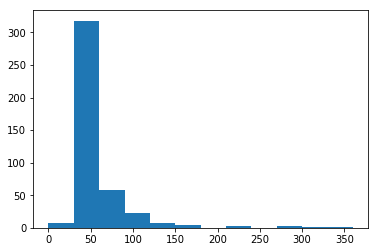

In [129]:
plt.hist(fedconsp['Total Length (Days)'], bins=12)
plt.show()

In [130]:
#look at wiretaps ordered to investigate Corruption
fedcorr = fed17.loc[fed17['Offense']=='CORRUPTION']
fedcorr

,Jurisdiction,A.O. Number,Judge,Attorney General or Designee,Offense,Type,Location,Application Date,Original Order (Days),Number of Extensions,...,Total Cost($),Other Than Manpower Cost ($),Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related
741,COLORADO,2017-73,BLACKBURN,NaN,CORRUPTION,"WC,TX",D,02/23/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
742,COLORADO,2017-74,BLACKBURN,NaN,CORRUPTION,WC,D,03/24/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
744,COLORADO,2017-76,KRIEGER,HULSER,CORRUPTION,WC,D,06/02/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
745,COLORADO,2017-77,BLACKBURN,HULSER,CORRUPTION,"WC,TX",D,05/22/2017,30.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1077,"ILLINOIS, NORTHERN",2011-69,ST. EVE,NaN,CORRUPTION,WC,D,10/18/2010,30.0,5.0,...,0,0,0.0,0.0,0.0,0.0,0.0,0.0,RELATED TO NO. 2011-70,RELATED TO NO. 2011-70
1078,"ILLINOIS, NORTHERN",2011-70,KENDALL,NaN,CORRUPTION,WC,D,09/24/2010,30.0,6.0,...,"495,630","2,295",7.0,1.0,0.0,0.0,0.0,8.0,NaN,NaN
1167,"ILLINOIS, NORTHERN",2017-83,CASTILLO,NaN,CORRUPTION,WC,D,02/28/2017,30.0,3.0,...,"569,403","6,115",0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN
1176,"ILLINOIS, NORTHERN",2017-92,CASTILLO,HULSER,CORRUPTION,"WC,TX",D,03/31/2017,30.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1834,NEW JERSEY,2017-21,MCNULTY,NaN,CORRUPTION,"WC,TX",D,07/21/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1835,NEW JERSEY,2017-22,MCNULTY,NaN,CORRUPTION,"WC,TX",D,07/21/2017,30.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# Number of wiretaps per jurisdiction
fed17['Jurisdiction'].value_counts()

CALIFORNIA, SOUTHERN       219
TEXAS, SOUTHERN            189
CALIFORNIA, CENTRAL        175
ARIZONA                    135
ILLINOIS, NORTHERN         133
NEW YORK, SOUTHERN         108
COLORADO                    96
TEXAS, WESTERN              92
MISSOURI, EASTERN           82
MARYLAND                    66
NEW JERSEY                  64
FLORIDA, SOUTHERN           59
CONNECTICUT                 53
LOUISIANA, EASTERN          52
OHIO, NORTHERN              52
INDIANA, SOUTHERN           50
GEORGIA, NORTHERN           49
OKLAHOMA, WESTERN           48
FLORIDA, MIDDLE             48
PENNSYLVANIA, WESTERN       45
UTAH                        45
DISTRICT OF COLUMBIA        44
NEW YORK, EASTERN           43
SOUTH CAROLINA              40
NEW MEXICO                  39
NEW YORK, NORTHERN          38
CALIFORNIA, NORTHERN        37
ARKANSAS, EASTERN           37
KANSAS                      35
OHIO, SOUTHERN              34
                          ... 
ALABAMA, NORTHERN           15
WEST VIR

In [132]:
#How many wiretaps were reported by the prosecutor?
fed17['Installation'].value_counts()

INSTALLED AND USED      1721
NO PROSECUTOR REPORT    1283
NEVER INSTALLED           22
Name: Installation, dtype: int64

Close to half of all wiretaps did not have a prosecutor report. Why might this be?

In [133]:
#New dataframe: keep only records that were reported
fed_rep = fed17.loc[fed17['Installation'] == 'INSTALLED AND USED']

In [134]:
fed_rep.describe()

,Original Order (Days),Number of Extensions,Total Length (Days),Number of Days in Operation,Avg. Intercepts Per Day,Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted
count,1721.000000,1721.000000,1721.000000,1714.000000,1684.000000,1620.000000,1606.000000,1608.000000,1608.000000,1608.000000,1606.000000
mean,29.987798,0.534573,46.024985,41.931155,415.097981,2.375926,0.018057,0.047264,0.024254,0.001244,0.365504
std,0.506208,1.070805,32.134238,33.126779,12561.570722,7.388875,0.320121,1.238364,0.643794,0.035256,2.953265
min,9.000000,0.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,30.000000,29.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,0.000000,30.000000,30.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,30.000000,1.000000,60.000000,58.000000,116.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.000000,16.000000,510.000000,510.000000,515477.000000,130.000000,11.000000,40.000000,25.000000,1.000000,70.000000


### State Courts

In [135]:
# read state intercept data
state17 = pd.read_csv('statewire_2017.csv')
state17.head()

,State,Jurisdiction,A.O. Number,Judge,Prosecutor,Offense,Type,Location,Application Date,Original Order (Days),...,Total Cost($),Other Than Manpower Cost ($),Arrests,Trials,Motions Granted,Motions Denied,Motions Pending,Persons Convicted,Cost Related,Results Related
0,ALASKA,3rd Judicial District,2017-1,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALASKA,3rd Judicial District,2017-2,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALASKA,3rd Judicial District,2017-3,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ALASKA,3rd Judicial District,2017-4,MOTYKA,LINDEMUTH,MURDER,"WC,TX",D,05/15/2017,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ALASKA,4th Judicial District,2017-1,MACDONALD,LINDEMUTH,MURDER,"WC,TX",D,02/24/2017,30.0,...,"60,744","20,000",3.0,NaN,0.0,0.0,0.0,NaN,NaN,NaN


In [136]:
# Number of wiretaps per offense
state17['Offense'].value_counts()

NARCOTICS          1224
DRUGS - ILLEGAL     263
MURDER              192
OTHER               128
CONSPIRACY          102
RACKETEERING         83
GAMBLING             27
CORRUPTION           24
LARCENY              24
BRIBERY               3
ASSAULT               3
$LAUNDERING           3
ARSON                 2
INTIMIDATION          1
POSSESSION            1
TERRORISM             1
FIREARMS              1
FRAUD                 1
FORGERY               1
Name: Offense, dtype: int64

In [137]:
# Number of wiretaps per state
state17['State'].value_counts()

CALIFORNIA        610
NEW YORK          550
NEVADA            139
COLORADO          139
NORTH CAROLINA    109
NEW JERSEY        103
FLORIDA            86
PENNSYLVANIA       75
ILLINOIS           46
ARIZONA            39
GEORGIA            31
MASSACHUSETTS      28
TENNESSEE          28
MARYLAND           25
MISSISSIPPI        10
OHIO               10
INDIANA             9
TEXAS               8
WYOMING             7
ALASKA              7
LOUISIANA           7
WISCONSIN           6
OKLAHOMA            4
UTAH                3
NEBRASKA            2
VIRGINIA            2
HAWAII              2
IDAHO               2
SOUTH CAROLINA      1
KANSAS              1
Name: State, dtype: int64

In [138]:
# Number of wiretaps per jurisdiction
state17['Jurisdiction'].value_counts()

LOS ANGELES                                        225
NEW YORK                                           152
CLARK                                              139
SUFFOLK                                            130
RIVERSIDE                                          118
QUEENS                                              98
2ND JUDICIAL DISTRICT (DENVER)                      97
Supreme Court Appellate Division 2nd Department     62
SUPERIOR COURT OF PENNSYLVANIA                      54
SAN JOAQUIN                                         48
KINGS                                               41
SAN BERNARDINO                                      38
MERCED                                              36
18TH JUDICIAL CIRCUIT (BREVARD/SEMINOLE)            30
SAN DIEGO                                           28
COOK                                                28
GUILFORD                                            28
20TH JUDICIAL DISTRICT (DAVIDSON)                   26
NASSAU    

## Maps

In [139]:
#load mapping libraries
import geopandas as gpd
import pysal as ps
from pysal.contrib.viz import mapping as maps
import palettable as pltt
from seaborn import palplot

In [140]:
#create link to file directory
jur_dir = 'US_District_Court_Jurisdictions/'
#call file
court_jur = jur_dir + 'US_District_Court_Jurisdictions.shp'
#read shapefile with geopandas
jur = gpd.read_file(court_jur)
jur.set_index('DISTRICT')

,FID,ABBR,SQ_Miles,Shape_Leng,Shape_Area,District_N,Shape__Are,Shape__Len,geometry
DISTRICT,,,,,,,,,
ALABAMA MIDDLE,1,ALM,1.557104e+04,9.918902,3.851034,11,5.634653e+10,1.200787e+06,"POLYGON ((-85.3434143069999 33.4967117310001, ..."
ALABAMA NORTHERN,2,ALN,2.279241e+04,12.526683,5.752874,11,8.590670e+10,1.525150e+06,"POLYGON ((-88.1822509769999 35.0087089540001, ..."
ALABAMA SOUTHERN,3,ALS,3.672870e+04,14.291408,3.267182,11,4.755904e+10,1.725692e+06,"(POLYGON ((-88.0563507079999 30.1896820070001,..."
ALASKA,4,AK,2.130451e+07,787.366223,279.696379,9,8.146772e+12,1.146259e+08,"(POLYGON ((-179.098083496 51.3043937680002, -1..."
ARIZONA,5,AZ,1.140598e+05,23.752602,28.930993,9,4.342576e+11,2.888358e+06,"POLYGON ((-110.539299011 37.004226685, -110.47..."
ARKANSAS EASTERN,6,ARE,2.887509e+04,20.282134,7.391100,8,1.119305e+11,2.444057e+06,"POLYGON ((-90.6844940189999 36.4965057370001, ..."
ARKANSAS WESTERN,7,ARW,2.429224e+04,17.572698,6.190137,8,9.333129e+10,2.130771e+06,"POLYGON ((-93.3690338129999 36.496860504, -93...."
CALIFORNIA CENTRAL,8,CAC,7.773755e+04,26.141797,10.235889,9,1.540900e+11,3.109362e+06,"(POLYGON ((-118.571754456 33.0296134950001, -1..."
CALIFORNIA EASTERN,9,CAE,9.178595e+04,32.204502,23.632805,9,3.745997e+11,4.011210e+06,"(POLYGON ((-121.839935303 38.0620040890002, -1..."


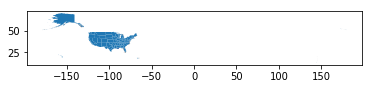

In [141]:
jur.plot()

In [142]:
#remove jurisdictions that cause scaling problems when plotting
jur = jur[jur.DISTRICT != 'GUAM']
jur = jur[jur.DISTRICT != 'ALASKA']
jur = jur[jur.DISTRICT != 'NORTHERN MARIANA ISLANDS']
jur = jur[jur.DISTRICT != 'VIRGIN ISLANDS']
jur = jur[jur.DISTRICT != 'HAWAII']
jur = jur[jur.DISTRICT != 'PUERTO RICO']
jur = jur[jur.DISTRICT != 'BERMUDA']

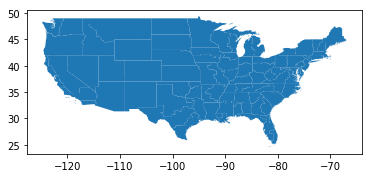

In [143]:
jur.plot()

In [144]:
#check dataframe and projection
jur.crs

{'init': 'epsg:4326'}

In [1]:
#Set up figure and axis with different size
f, ax = plt.subplots(1, figsize=(15,30))
#Add layer of polygons on the axis
jur.plot(ax=ax)
#Scale axis
plt.axis('scaled')
#Remove axis
ax.set_axis_off()
#Display
plt.show()

NameError: name 'plt' is not defined